# AY250-homewor 4
## by Ying Cao

In [1]:
# Simple serial implemetation 
# the given
from random import uniform
from math import sqrt, floor
from time import time


# throw the given nuber of darts, and check whether each of them is in circle
def Pi_approximation(no_darts):
    # used to count number of darts in the circle
    no_darts_circle = 0
    for n in range(no_darts):
        x, y = uniform(0,1), uniform(0,1)
        if sqrt((x-0.5)**2 + (y-0.5)**2) <= 0.5:
            no_darts_circle += 1
    # approximate Pi
    # area of circle = pi*r**2; area of the square = 4*r*2*2 and r = 0.5 here
    return 4 * no_darts_circle / no_darts

# total darts to generate
no_darts = 200000

# start time
tic = time()

Pi_approx = Pi_approximation(no_darts)

# end time
tac  = time()
# execution time
execution_time = tac - tic

# approximate Pi
# area of circle = pi*r**2; area of the square = 4*r*2*2 and r = 0.5 here

print("Pi Approximation: ", Pi_approx)
print("Number of Darts: ", no_darts)
print("Execution Time (s): ", execution_time)
print("Darts Thrown per Second:", no_darts/execution_time)

Pi Approximation:  3.1393
Number of Darts:  200000
Execution Time (s):  0.2319958209991455
Darts Thrown per Second: 862084.4941889563


In [2]:
import numpy as np

# Specify experiments parameters
no_darts_set = np.logspace(1,7,10)

# Number of simulations
no_sim = 100 

# Array to store results
Times = np.zeros((no_sim,len(no_darts_set)))
Rates = np.zeros((no_sim,len(no_darts_set)))
Pis = np.zeros((no_sim,len(no_darts_set)))


## Simple Serial Method

In [3]:

Time_Means_serial = np.zeros(len(no_darts_set))
Time_Stds_serial  = np.zeros(len(no_darts_set))

Rates_Means_serial  = np.zeros(len(no_darts_set))
Rates_Stds_serial  = np.zeros(len(no_darts_set))

for no_set in range(len(no_darts_set)):
    no_darts = int(no_darts_set[no_set])
    print("No_darts: ", no_darts)
    for simulation in range(no_sim):# start time
        #print(simulation+1)
        tic = time()

        # Approximate Pi
                
        Pis[simulation,no_set] = Pi_approximation(no_darts)

        # end time
        tac  = time()
        # execution time
        execution_time = tac - tic
        Times[simulation,no_set] = execution_time
        
        # Rate
        Rates[simulation,no_set] = no_darts/execution_time
    
    Time_Means_serial[no_set] = np.mean(Times[:,no_set])
    Time_Stds_serial[no_set] = np.std(Times[:,no_set])
    Rates_Means_serial[no_set] = np.mean(Rates[:,no_set])
    Rates_Stds_serial[no_set] = np.std(Rates[:,no_set])


No_darts:  10
No_darts:  46
No_darts:  215
No_darts:  1000
No_darts:  4641
No_darts:  21544
No_darts:  100000
No_darts:  464158
No_darts:  2154434
No_darts:  10000000


In [ ]:
# Plot
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.loglog(no_darts_set, Time_Means_serial, '-', label = 'Serial', c='red', lw=2)
Time_lb = [max(x,10**(-5)) for x in Time_Means_serial-Time_Stds_serial]
ax1.fill_between(no_darts_set, Time_lb, Time_Means_serial+Time_Stds_serial,
                 facecolor='red', alpha=0.5)

ax2 = ax1.twinx()
ax2.loglog(no_darts_set, Rates_Means_serial, '--', c='red', lw=2)
ax2.fill_between(no_darts_set, Rates_Means_serial-Rates_Stds_serial, Rates_Means_serial+Rates_Stds_serial,
                 facecolor='red', alpha=0.5)

ax1.legend(loc=4)
ax1.grid()
ax1.set_xlabel("Darts Thrown")
ax1.set_ylabel("Execution Time (seconds), solid line")
ax2.set_ylabel("Simulation Rate (darts/second), dashed line")
ax2.set_ylim(10**(2), 10**7)
ax1.set_ylim(-10**(-5), 10**2)
plt.show()

fig.savefig('Serial.png')

# multiprocessing

In [4]:
import multiprocessing
from multiprocessing import Pool


In [5]:
Time_Means_multiprocessing = np.zeros(len(no_darts_set))
Time_Stds_multiprocessing  = np.zeros(len(no_darts_set))

Rates_Means_multiprocessing  = np.zeros(len(no_darts_set))
Rates_Stds_multiprocessing  = np.zeros(len(no_darts_set))

if __name__=='__main__':
    pool = Pool(processes=4)

    for no_set in range(len(no_darts_set)):
        no_darts = int(no_darts_set[no_set])
        print("No_darts: ", no_darts)
        for simulation in range(no_sim):# start time
            #print(simulation+1)
            tic = time()

            # Approximate Pi
            # number of darts to throw on each core
            each_core = floor(no_darts/4)
            #print([each_core,each_core,each_core,no_darts-3*each_core])
            temp = pool.map(Pi_approximation, [each_core,each_core,each_core,no_darts-3*each_core])
            Pis[simulation,no_set] = sum(temp)/4
            #print(Pis[simulation,no_set] )
            # end time
            tac  = time()
            # execution time
            execution_time = tac - tic
            Times[simulation,no_set] = execution_time

            # Rate
            Rates[simulation,no_set] = no_darts/execution_time

        Time_Means_multiprocessing[no_set] = np.mean(Times[:,no_set])
        Time_Stds_multiprocessing[no_set] = np.std(Times[:,no_set])
        Rates_Means_multiprocessing[no_set] = np.mean(Rates[:,no_set])
        Rates_Stds_multiprocessing[no_set] = np.std(Rates[:,no_set])

No_darts:  10
No_darts:  46
No_darts:  215
No_darts:  1000
No_darts:  4641
No_darts:  21544
No_darts:  100000
No_darts:  464158
No_darts:  2154434
No_darts:  10000000


In [6]:
pool.terminate()
del pool

In [ ]:
# Plot
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.loglog(no_darts_set, Time_Means_multiprocessing, '-', label = 'Multiprocessing', c='blue', lw=2)
Time_lb = [max(x,10**(-5)) for x in Time_Means_multiprocessing-Time_Stds_multiprocessing]
ax1.fill_between(no_darts_set, Time_lb, Time_Means_multiprocessing+Time_Stds_multiprocessing,
                 facecolor='blue', alpha=0.5)

ax2 = ax1.twinx()
ax2.loglog(no_darts_set, Rates_Means_multiprocessing, '--', c='blue', lw=2)
ax2.fill_between(no_darts_set, Rates_Means_multiprocessing-Rates_Stds_multiprocessing, Rates_Means_multiprocessing+Rates_Stds_multiprocessing,
                 facecolor='blue', alpha=0.5)

ax1.legend(loc=4)
ax1.grid()
ax1.set_xlabel("Darts Thrown")
ax1.set_ylabel("Execution Time (seconds), solid line")
ax2.set_ylabel("Simulation Rate (darts/second), dashed line")
ax2.set_ylim(10**(2), 10**7)
ax1.set_ylim(-10**(-5), 10**2)
plt.show()

fig.savefig('Multiprocessing.png')

# ipyparallel

In [ ]:
# in shell, run the following before using ipyparallel
! ipcluster start -n 4

In [7]:
import ipyparallel
clients = ipyparallel.Client()
clients.ids
dview = clients.direct_view()

with dview.sync_imports():
    from random import uniform
    from math import sqrt, floor
    import numpy as np

importing uniform from random on engine(s)
importing sqrt,floor from math on engine(s)
importing numpy on engine(s)


In [8]:
Time_Means_ipyparallel = np.zeros(len(no_darts_set))
Time_Stds_ipyparallel  = np.zeros(len(no_darts_set))

Rates_Means_ipyparallel  = np.zeros(len(no_darts_set))
Rates_Stds_ipyparallel  = np.zeros(len(no_darts_set))

for no_set in range(len(no_darts_set)):
    no_darts = int(no_darts_set[no_set])
    print("No_darts: ", no_darts)
    for simulation in range(no_sim):# start time
        #print(simulation+1)
        tic = time()

        # Approximate Pi
        # number of darts to throw on each core
        each_core = floor(no_darts/4)
        #print([each_core,each_core,each_core,no_darts-3*each_core])
        
        temp = dview.map_sync(Pi_approximation, [each_core,each_core,each_core,no_darts-3*each_core])
        Pis[simulation,no_set] = sum(temp)/4
        # end time
        tac  = time()
        # execution time
        execution_time = tac - tic
        Times[simulation,no_set] = execution_time
        
        # Rate
        Rates[simulation,no_set] = no_darts/execution_time
    
    Time_Means_ipyparallel[no_set] = np.mean(Times[:,no_set])
    Time_Stds_ipyparallel[no_set] = np.std(Times[:,no_set])
    Rates_Means_ipyparallel[no_set] = np.mean(Rates[:,no_set])
    Rates_Stds_ipyparallel[no_set] = np.std(Rates[:,no_set])

No_darts:  10
No_darts:  46
No_darts:  215
No_darts:  1000
No_darts:  4641
No_darts:  21544
No_darts:  100000
No_darts:  464158
No_darts:  2154434
No_darts:  10000000


In [ ]:
# Plot
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.loglog(no_darts_set, Time_Means_ipyparallel, '-', label = 'Ipyparallel', c='green', lw=2)
Time_lb = [max(x,10**(-5)) for x in Time_Means_ipyparallel-Time_Stds_ipyparallel]
ax1.fill_between(no_darts_set, Time_lb, Time_Means_ipyparallel+Time_Stds_ipyparallel,
                 facecolor='green', alpha=0.5)

ax2 = ax1.twinx()
ax2.loglog(no_darts_set, Rates_Means_ipyparallel, '--', c='green', lw=2)
ax2.fill_between(no_darts_set, Rates_Means_ipyparallel-Rates_Stds_ipyparallel, Rates_Means_ipyparallel+Rates_Stds_ipyparallel,
                 facecolor='green', alpha=0.5)

ax1.legend(loc=4)
ax1.grid()
ax1.set_xlabel("Darts Thrown")
ax1.set_ylabel("Execution Time (seconds), solid line")
ax2.set_ylabel("Simulation Rate (darts/second), dashed line")
ax2.set_ylim(10**(2), 10**7)
ax1.set_ylim(-10**(-5), 10**2)
plt.show()

fig.savefig('Ipyparallel.png')

In [9]:
! ipcluster stop

2016-09-26 21:08:39.788 [IPClusterStop] Stopping cluster [pid=4459] with [signal=<Signals.SIGINT: 2>]


# Comparison plot - errorbar plots

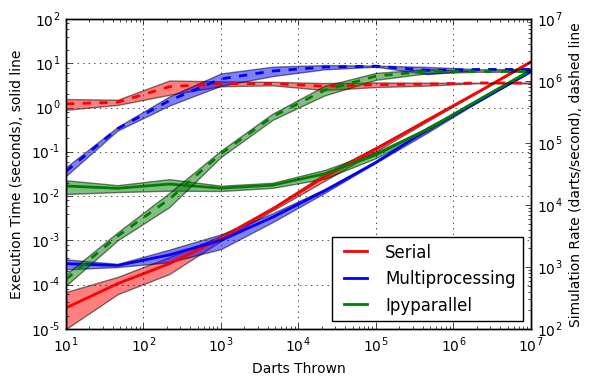

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.loglog(no_darts_set, Time_Means_serial, '-', label = 'Serial', c='red', lw=2)
Time_lb = [max(x,10**(-5)) for x in Time_Means_serial-Time_Stds_serial]
ax1.fill_between(no_darts_set, Time_lb, Time_Means_serial+Time_Stds_serial,
                 facecolor='red', alpha=0.5)

ax2 = ax1.twinx()
ax2.loglog(no_darts_set, Rates_Means_serial, '--', c='red', lw=2)
ax2.fill_between(no_darts_set, Rates_Means_serial-Rates_Stds_serial, Rates_Means_serial+Rates_Stds_serial,
                 facecolor='red', alpha=0.5)


ax1.loglog(no_darts_set, Time_Means_multiprocessing, '-', label = 'Multiprocessing', c='blue', lw=2)
Time_lb = [max(x,10**(-5)) for x in Time_Means_multiprocessing-Time_Stds_multiprocessing]
ax1.fill_between(no_darts_set, Time_lb, Time_Means_multiprocessing+Time_Stds_multiprocessing,
                 facecolor='blue', alpha=0.5)

ax2.loglog(no_darts_set, Rates_Means_multiprocessing, '--', c='blue', lw=2)
ax2.fill_between(no_darts_set, Rates_Means_multiprocessing-Rates_Stds_multiprocessing, Rates_Means_multiprocessing+Rates_Stds_multiprocessing,
                 facecolor='blue', alpha=0.5)

ax1.loglog(no_darts_set, Time_Means_ipyparallel, '-', label = 'Ipyparallel', c='green', lw=2)
Time_lb = [max(x,10**(-5)) for x in Time_Means_ipyparallel-Time_Stds_ipyparallel]
ax1.fill_between(no_darts_set, Time_lb, Time_Means_ipyparallel+Time_Stds_ipyparallel,
                 facecolor='green', alpha=0.5)

ax2.loglog(no_darts_set, Rates_Means_ipyparallel, '--', c='green', lw=2)
ax2.fill_between(no_darts_set, Rates_Means_ipyparallel-Rates_Stds_ipyparallel, Rates_Means_ipyparallel+Rates_Stds_ipyparallel,
                 facecolor='green', alpha=0.5)

ax1.legend(loc=4)
ax1.grid()
ax1.set_xlabel("Darts Thrown")
ax1.set_ylabel("Execution Time (seconds), solid line")
ax2.set_ylabel("Simulation Rate (darts/second), dashed line")
ax2.set_ylim(10**(2), 10**7)
ax1.set_ylim(-10**(-5), 10**2)
plt.show()

fig.savefig('Comparison.png')

# remember to write readme